In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from scipy.stats import sem
import matplotlib.cm as cm

In [4]:
plt.rcParams['font.family'] = 'sans-serif'

# Helper functions

In [5]:
def smooth(xs, ys, degree=8):
    poly = np.polyfit(xs, ys, degree)
    poly_y = np.poly1d(poly)(xs)
    return poly_y

def smooth(xs, ys):
    from scipy.signal import lfilter
    n = 5             # larger n gives smoother curves
    b = [1.0 / n] * n  # numerator coefficients
    a = 1              # denominator coefficient
    y_lf = lfilter(b, a, ys)
    return y_lf

def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

# Foraging

In [6]:
pfiles = []

pickle_dir = 'pickles/foraging_simpler_dim10/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/foraging_simpler_dim10_pt2/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/foraging_simpler_dim10_pt3/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/foraging_simpler_dim10_pt4/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/foraging_simpler_dim10_pt5/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

In [12]:
pfiles = []

pickle_dir = 'pickles/foraging_ep100_simpler_dim10/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

In [13]:
_results = {
    'dimensionality_tracking': [],
    'valid_scores': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
    idxs = np.arange(n_scores)
    for idx in idxs:
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['valid_scores'].append(
            results['valid_scores'][idx])
        _results['fname'].append(
            results['fname'][idx*multiple])
results = _results

data = {'scores': [], 'epochs': [], 'fname': []}
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)
df = pd.DataFrame(data)

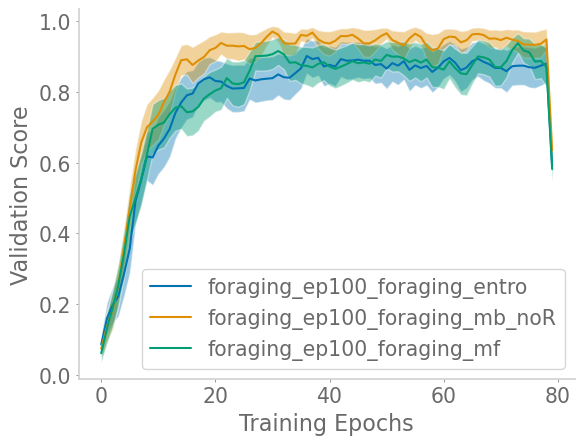

In [15]:
new_df = df.copy()
smooth_line = True
#new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['foraging_mf', 'foraging_entro_larger', 'foraging_mb_larger']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs, means, label=fname)
    ax.fill_between(epochs, mean_lowerbound, mean_upperbound, alpha=0.4)
plt.ylabel('Validation Score')
plt.xlabel('Training Epochs')
#plt.legend(labels=['MF', 'MF + S', 'MF + S + MB'], title='Training', title_fontsize=14)
plt.legend()
#plt.xlim(0, 38)
plt.show()

# Foraging Transfer

In [121]:
np.sort(os.listdir('/mnt/smb/locker/aronov-locker/Ching/rl/pickles/'))

array(['.DS_Store', 'foraging4x4_simplest_dim5',
       'foraging4x4_simplest_e10d10_dim5',
       'foraging4x4_simplest_e16d10_dim5',
       'foraging4x4_simplest_e32d32_dim5',
       'foraging4x4_simplest_e32d64_dim5',
       'foraging4x4_simplest_e64d10_dim5', 'foraging_noconv_noact_dim5',
       'foraging_noconv_noact_dim5_cortex', 'foraging_random_noconv_dim5',
       'foraging_random_noconv_newstate_dim5', 'foraging_simpler_dim5',
       'foraging_simpler_noAct_dim5', 'foraging_simplest_dim10',
       'foraging_simplest_dim3', 'foraging_simplest_dim4',
       'foraging_simplest_dim4_v2', 'foraging_simplest_dim5',
       'foraging_simplest_dim5_v2', 'foraging_simplest_dim7',
       'foraging_simplest_dim9', 'foraging_simplest_linear_dim5',
       'foraging_simplest_noact_dim5',
       'foraging_simplest_noact_dim5_cortex',
       'foraging_simplest_oneconv_dim5',
       'foraging_simplest_oneconv_dim5_pt2', 'foraging_simplest_q32_dim4',
       'foraging_simplest_q32_dim7', 'foragi

In [126]:
pfiles = []

pickle_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/pickles/foraging4x4_simplest_e10d10_dim5/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

_results = {
    'dimensionality_tracking': [],
    'valid_scores': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
    idxs = np.arange(n_scores)
    for idx in idxs:
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['valid_scores'].append(
            results['valid_scores'][idx])
        fname = results['fname'][idx*multiple]
        if fname.endswith('mb_only'):
            fname = 'MB only'
        elif 'mb' in fname:
            fname = 'MB'
        elif 'mf' in fname:
            fname = 'MF'
        elif 'entro' in fname:
            fname = 'Entro'
        elif 'clean' in fname:
            fname = 'Random'
        _results['fname'].append(fname)
results = _results

data = {'scores': [], 'epochs': [], 'fname': []}
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)
df = pd.DataFrame(data)

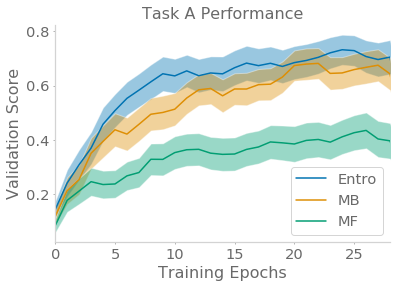

In [127]:
new_df = df.copy()
smooth_line = True
#new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['foraging_entro', 'foraging_entro_larger', 'foraging_mb_larger']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs, means, label=fname)
    ax.fill_between(epochs, mean_lowerbound, mean_upperbound, alpha=0.4)
plt.ylabel('Validation Score')
plt.xlabel('Training Epochs')
title = 'Transfer Performance' if 'transfer' in pickle_dir else 'Task A Performance'
plt.title(title)
#plt.legend(labels=['MF', 'MF + S', 'MF + S + MB'], title='Training', title_fontsize=14)
plt.legend()
plt.xlim(0, 28)
plt.show()

# Catcher

In [744]:
pfiles = []

pickle_dir = 'pickles/catcher_simpler_dim10/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/catcher_simpler_dim10_pt2/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

In [745]:
_results = {
    'dimensionality_tracking': [],
    'valid_scores': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
    idxs = np.arange(n_scores)
    for idx in idxs:
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['valid_scores'].append(
            results['valid_scores'][idx])
        _results['fname'].append(
            results['fname'][idx*multiple])
results = _results

data = {'scores': [], 'epochs': [], 'fname': []}
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)
df = pd.DataFrame(data)

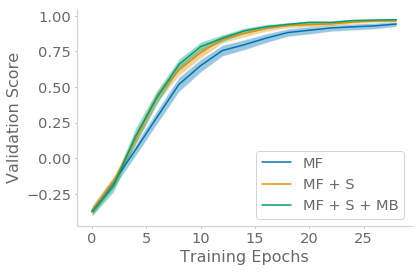

In [750]:
new_df = df.copy()
smooth_line = False
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    ['catcher_mf', 'catcher_entro', 'catcher_mb_larger']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs, means)
    ax.fill_between(epochs, mean_lowerbound, mean_upperbound, alpha=0.4)
plt.legend(labels=['MF', 'MF + S', 'MF + S + MB'])
plt.ylabel('Validation Score')
plt.xlabel('Training Epochs')
plt.show()

# Catcher Transfer

In [841]:
pfiles = []

pickle_dir = 'pickles/transfer_catcher_simpler_dim10/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt2/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt3/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt4/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt5/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt6/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt7/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt8/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
    
pickle_dir = 'pickles/transfer_catcher_simpler_dim10_pt9/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

In [854]:
_results = {
    'dimensionality_tracking': [],
    'valid_scores': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
#     idxs = np.argwhere(
#         np.array([v[-1] for v in results['valid_scores']]) > -700
#         ).squeeze()
    idxs = np.arange(n_scores)
    if idxs.size == 0: continue
    if idxs.size == 1: idxs = [idxs.item()]
    for idx in idxs:
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['valid_scores'].append(
            results['valid_scores'][idx])
        _results['fname'].append(
            results['fname'][idx*multiple])
results = _results

data = {'scores': [], 'epochs': [], 'fname': []}
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        if score < 0:
            score += 999
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)
df = pd.DataFrame(data)

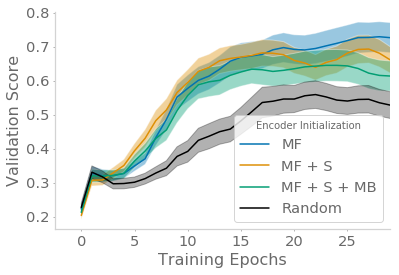

In [855]:
new_df = df.copy()
smooth_line = True
epochs = np.unique(new_df['epochs'])
new_df['scores'] /= 500
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    ['transfer_catcher_mf', 'transfer_catcher_entro_qloss',
     'transfer_catcher_mb_noR_qloss', 'transfer_catcher_random']
    #np.unique(df['fname'])
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    if 'clean' in fname or 'random' in fname:
        color='black'
    else:
        color=None
    ax.plot(epochs, means, color=color)
    if color == 'black':
        ax.fill_between(epochs, mean_lowerbound, mean_upperbound, alpha=0.3, color=color)
    else:
        ax.fill_between(epochs, mean_lowerbound, mean_upperbound, alpha=0.4)
plt.legend(title='Encoder Initialization', labels=['MF', 'MF + S', 'MF + S + MB', 'Random'])
#plt.legend()
plt.ylabel('Validation Score')
plt.xlabel('Training Epochs')
plt.xlim(right=29)
plt.show()

# Dimensionality Plots

In [66]:
from scipy.special import rel_entr

In [107]:
pickle_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/pickles/foraging_simplest_dim9/'
pfiles = []
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

_results = {
    'dimensionality_tracking': [],
    'dimensionality_kl': [],
    'var_2d': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
    idxs = np.arange(n_scores)
    for idx in idxs:
        var_ratio = results['dimensionality_variance_ratio'][idx]
        n_components = len(var_ratio)
        kl = sum(rel_entr(np.ones(n_components)/n_components, var_ratio))
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['dimensionality_kl'].append(kl)
        _results['var_2d'].append(np.sum(var_ratio[:2]))
        fname = results['fname'][idx*multiple]
        if 'mb_only' in fname:
            fname = 'MB only'
        elif 'mb' in fname:
            fname = 'MB'
        elif 'mf' in fname:
            fname = 'MF'
        elif 'entro' in fname:
            fname = 'Entro'
        elif 'clean' in fname:
            fname = 'Random'
        _results['fname'].append(fname)
for key in _results.keys():
    _results[key] = np.array(_results[key])
results = _results

In [108]:
df = pd.DataFrame(results)

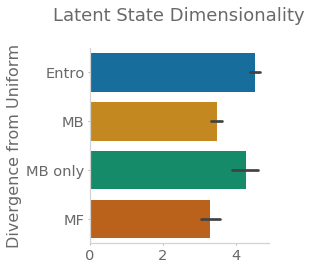

In [109]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='dimensionality_kl', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('Divergence from Uniform')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()

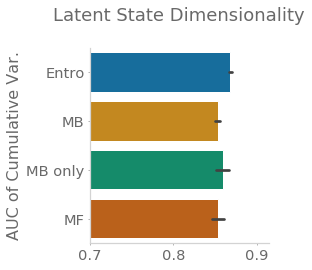

In [110]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='dimensionality_tracking', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('AUC of Cumulative Var.')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
plt.xlim(left=0.7)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()

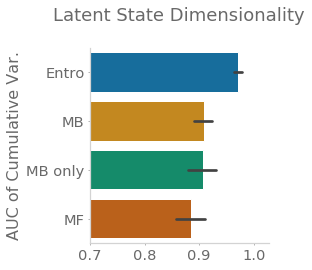

In [114]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='var_2d', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('AUC of Cumulative Var.')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
plt.xlim(left=0.7)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()